In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Question
- which previously purchased products will be in a user’s next order
- predict a space-delimited list of product_ids

In [2]:
sample_submission = pd.read_csv("instacart/sample_submission.csv")
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [3]:
type(sample_submission['products'][0])

str

# Import data

In [4]:
order_products_train = pd.read_csv("instacart/order_products__train.csv")
order_products_prior = pd.read_csv("instacart/order_products__prior.csv")
orders = pd.read_csv("instacart/orders.csv")
products = pd.read_csv("instacart/products.csv")
aisles = pd.read_csv("instacart/aisles.csv")
departments = pd.read_csv("instacart/departments.csv")

In [5]:
df_dict = {"order_products_train": order_products_train,  "order_products_prior": order_products_prior, 
 "orders": orders, "products": products, "aisles": aisles, "departments": departments}
for key, value in df_dict.items():
    print(key+" "+str(len(value)))

order_products_train 1384617
order_products_prior 32434489
orders 3421083
products 49688
aisles 134
departments 21


# Observe data

## products
- contains information about product and aisle + department

In [6]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [7]:
# how many product in each department
products['department_id'].value_counts()

11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64

### Products in top purchase department
- see section 6

In [8]:
# produce
products[products['department_id']==4]

,product_id,product_name,aisle_id,department_id
30,31,White Pearl Onions,123,4
42,43,Organic Clementines,123,4
44,45,European Cucumber,83,4
65,66,European Style Spring Mix,123,4
88,89,Yogurt Fruit Dip Sliced Apples,123,4
...,...,...,...,...
49577,49578,Black Garlic Bulbs,123,4
49618,49619,Opo Squash,83,4
49634,49635,"Baby Food Blueberry, Parsnip & Buckwheat Stage 2",83,4
49656,49657,Cabernet Tomatoes,83,4


In [9]:
# dairy eggs
products[products['department_id']==16]

,product_id,product_name,aisle_id,department_id
8,9,Light Strawberry Blueberry Yogurt,120,16
97,98,2% Yellow American Cheese,2,16
116,117,Petit Suisse Fruit,2,16
120,121,Sharp Cheddar,21,16
126,127,Marscapone,108,16
...,...,...,...,...
49616,49617,Creamy Mozzarella Sun-Dried Tomato & Basil Fla...,2,16
49621,49622,Original Powder Coffee Creamer,53,16
49627,49628,Yoghurt Blueberry,120,16
49643,49644,Feta Crumbles,2,16


In [10]:
# snacks
products[products['department_id']==19]

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
15,16,Mint Chocolate Flavored Syrup,103,19
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19
31,32,Nacho Cheese White Bean Chips,107,19
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19
...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19
49665,49666,Ginger Snaps Snacking Cookies,61,19
49670,49671,Milk Chocolate Drops,45,19


## aisles

In [11]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


## department

In [12]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Orders
- contains only information about an order and user id
- for each user, have 1 train or test row, the rest are prior
- order_number is used to tell which orders come first for each user
- there are 206,209 customers in total

In [13]:
orders.sort_values(by=['user_id', 'order_number']).head(30)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [14]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [15]:
orders.user_id.nunique()

206209

In [16]:
# let's see how many orders each user has
orders.groupby(['user_id'])['order_number'].count()

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

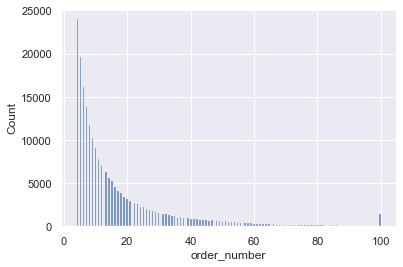

In [17]:
sns.set_theme()
ax = sns.histplot(orders.groupby(['user_id'])['order_number'].count())

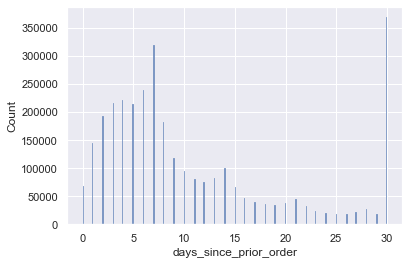

In [18]:
# let's see days since prior order
ax = sns.histplot(orders['days_since_prior_order'].dropna())

## Order_products
- reordered = whether the user order the same product again
- the same product can be from any previous orders

In [19]:
# let's see the products user_id = 1 bought for the first 3 visits

(order_products_prior[order_products_prior['order_id'].isin([2539329, 2398795, 473747])]).sort_values(by='order_id', ascending=False)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1


In [20]:
# let's see the products user_id = 1 bought for the 5th 6th 7th visits

(order_products_prior[order_products_prior['order_id'].isin([2710558, 1972919, 1839752])]).sort_values(
    by=['order_id', 'add_to_cart_order'] ,ascending=[False, True])

,order_id,product_id,add_to_cart_order,reordered
25701308,2710558,39190,1,1
25701309,2710558,9387,2,1
25701310,2710558,17668,3,1
25701311,2710558,47766,4,1
25701312,2710558,16965,5,1
25701313,2710558,28373,6,1
25701314,2710558,21903,7,1
25701315,2710558,22035,8,0
25701316,2710558,42265,9,0
25701317,2710558,18370,10,0


# Sample & Split data
- Let's take only 50,000 user_id to prevent out of memory error
- after that delete variable orders

In [21]:
import random
sample_user = random.sample(range(1, 206210), 50000)

In [22]:
sample_order = orders[orders['user_id'].isin(sample_user)]
sample_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420930,969311,206205,prior,1,4,12,NaN
3420931,2658896,206205,prior,2,2,15,30.0
3420932,414137,206205,prior,3,5,16,10.0


In [23]:
sample_order['eval_set'].value_counts()

prior    780596
train     31806
test      18194
Name: eval_set, dtype: int64

# Merge data
- merge order, order details and product details together

In [24]:
order_products = pd.concat([order_products_prior, order_products_train])
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [25]:
sample_order = sample_order.merge(order_products, how='left', on='order_id')
sample_order = sample_order.merge(products, how='left', on='product_id')
sample_order = sample_order.merge(aisles, how='left', on='aisle_id')
sample_order = sample_order.merge(departments, how='left', on='department_id')
sample_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1374495,3,prior,1,1,14,NaN,9387.0,1.0,0.0,Granny Smith Apples,24.0,4.0,fresh fruits,produce
1,1374495,3,prior,1,1,14,NaN,17668.0,2.0,0.0,Unsweetened Chocolate Almond Breeze Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,1374495,3,prior,1,1,14,NaN,15143.0,3.0,0.0,Blueberry Pint,24.0,4.0,fresh fruits,produce
3,1374495,3,prior,1,1,14,NaN,16797.0,4.0,0.0,Strawberries,24.0,4.0,fresh fruits,produce
4,1374495,3,prior,1,1,14,NaN,39190.0,5.0,0.0,Vanilla Unsweetened Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246811,1716008,206205,train,4,1,16,10.0,42495.0,15.0,0.0,Pink Lady (Cripps) Apple,24.0,4.0,fresh fruits,produce
8246812,1716008,206205,train,4,1,16,10.0,10181.0,16.0,1.0,Classic Guacamole,67.0,20.0,fresh dips tapenades,deli
8246813,1716008,206205,train,4,1,16,10.0,1158.0,17.0,0.0,Mango Chunks,116.0,1.0,frozen produce,frozen
8246814,1716008,206205,train,4,1,16,10.0,29499.0,18.0,0.0,"Ghee, Original",76.0,6.0,indian foods,international


# Observe sample_order
- so that to get the idea of how to aggregate the data

In [26]:
sample_order.sort_values(by=['user_id','order_number'])

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1374495,3,prior,1,1,14,NaN,9387.0,1.0,0.0,Granny Smith Apples,24.0,4.0,fresh fruits,produce
1,1374495,3,prior,1,1,14,NaN,17668.0,2.0,0.0,Unsweetened Chocolate Almond Breeze Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,1374495,3,prior,1,1,14,NaN,15143.0,3.0,0.0,Blueberry Pint,24.0,4.0,fresh fruits,produce
3,1374495,3,prior,1,1,14,NaN,16797.0,4.0,0.0,Strawberries,24.0,4.0,fresh fruits,produce
4,1374495,3,prior,1,1,14,NaN,39190.0,5.0,0.0,Vanilla Unsweetened Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246811,1716008,206205,train,4,1,16,10.0,42495.0,15.0,0.0,Pink Lady (Cripps) Apple,24.0,4.0,fresh fruits,produce
8246812,1716008,206205,train,4,1,16,10.0,10181.0,16.0,1.0,Classic Guacamole,67.0,20.0,fresh dips tapenades,deli
8246813,1716008,206205,train,4,1,16,10.0,1158.0,17.0,0.0,Mango Chunks,116.0,1.0,frozen produce,frozen
8246814,1716008,206205,train,4,1,16,10.0,29499.0,18.0,0.0,"Ghee, Original",76.0,6.0,indian foods,international


## product perchased

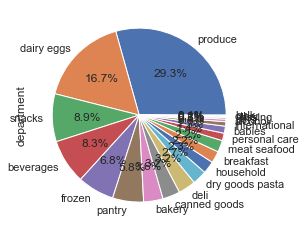

In [30]:
data = (sample_order[sample_order['eval_set'].isin(['prior','train'])]['department']).value_counts()
data.plot.pie(autopct="%.1f%%");

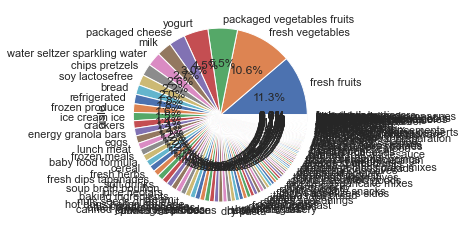

In [31]:
data = (sample_order[sample_order['eval_set'].isin(['prior','train'])]['aisle']).value_counts()
data.plot.pie(autopct="%.1f%%");

### reorder ratio
- in each department
- in each aisle

In [33]:
def findratio(x):
    all_ordered = len(x)
    reordered = len(x[x['reordered']==1])
    return reordered/all_ordered
    
(sample_order.groupby('department').apply(findratio)).sort_values(ascending=False)

department
dairy eggs         0.670633
beverages          0.655305
produce            0.651973
bakery             0.627344
deli               0.609275
pets               0.584072
babies             0.581108
bulk               0.577878
alcohol            0.576109
snacks             0.574700
meat seafood       0.567469
breakfast          0.560533
frozen             0.540655
dry goods pasta    0.463033
canned goods       0.455086
household          0.405585
other              0.403153
missing            0.396948
international      0.372202
pantry             0.346830
personal care      0.321359
dtype: float64

In [34]:
(sample_order.groupby('aisle').apply(findratio)).sort_values(ascending=False).head(30)

aisle
milk                             0.781396
water seltzer sparkling water    0.732585
fresh fruits                     0.719756
eggs                             0.708631
packaged produce                 0.698031
soy lactosefree                  0.691762
yogurt                           0.687675
cream                            0.685213
bread                            0.671348
refrigerated                     0.664087
energy sports drinks             0.649220
breakfast bakery                 0.648521
packaged vegetables fruits       0.641989
white wines                      0.641789
soft drinks                      0.639602
bulk dried fruits vegetables     0.622096
frozen breakfast                 0.621781
coffee                           0.620314
prepared meals                   0.618830
fresh dips tapenades             0.611267
trail mix snack mix              0.609847
poultry counter                  0.609738
lunch meat                       0.608474
tofu meat alternatives      

## unique products each customer purchase

In [35]:
# how many unique products each user has purchased
(sample_order.groupby('user_id')['product_id'].nunique()).describe()

count    50000.000000
mean        67.344240
std         56.607498
min          1.000000
25%         28.000000
50%         51.000000
75%         90.000000
max        613.000000
Name: product_id, dtype: float64

[Text(0.5, 0, 'number of unique products per user'), Text(0, 0.5, 'count')]

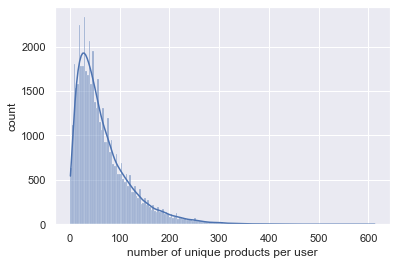

In [36]:
ax = sns.histplot(sample_order.groupby('user_id')['product_id'].nunique(), kde=True)
ax.set(xlabel='number of unique products per user', ylabel='count')

# Export data

In [37]:
sample_order.to_csv("instacart/sample_order.csv", index=False)